# Primera red neuronal

In [1]:
import tensorflow as tf
import pandas as pd 
from keras.models import  Sequential
from keras.layers import  Dense
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [3]:
# from tensorflow.python.client import device_lib
# device_lib.list_local_devices()

In [4]:
# from tensorflow.python.client import device_lib
# local_device_protos = device_lib.list_local_devices()
# [x.name for x in local_device_protos]

In [5]:
print(tf.test.gpu_device_name())


In [6]:
# tf.debugging.set_log_device_placement(True)

# XOR 2 entradas tanh

In [7]:
# with tf.device('/GPU:0'):
entradas = np.array([[0,0],[0,1],[1,0],[1,1]])
print(entradas.shape)


(4, 2)


In [8]:
salidas =  np.array([[0],[1],[1],[0]])
salidas.shape

(4, 1)

In [9]:
#Define el tipo de modelo en este caso sera secuencial
model = Sequential()
#es la primera capa oculta que va tener dos entradas,16 neuronas en la capa oculta y su funcion de activacion sera tanh
model.add(Dense(16,input_dim= 2,activation='tanh'))
#esta seria la siguente capa en este caso seria nuestra capa de salida que solo tiene una neuorna y su funciona de activacion es la sigmoid
model.add(Dense(1,activation='sigmoid'))
#Cuando es la primero capa oculta posterio a la capa de entrada se le pone el numero de entradas como este ejemplo 
#claves sequential y Dense

In [10]:
model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['binary_accuracy'])
#En python a los algoritmos de propagacion se le conocen como optimizacion pero este tiene especifaciones mejoradas con tal no haya sobre ajuste
#En otra palabras los algoritmos de optimizacion de python estan basado en algoritmos de propagacion ver video clase 7

In [11]:
#Este es el entrenamiento
# with tf.device('/GPU:0'):
XORTest = model.fit(entradas,
                    salidas,
                    epochs=1000
                    )

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.2596 - binary_accuracy: 0.7500
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2594 - binary_accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2591 - binary_accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2589 - binary_accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.2587 - binary_accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2585 - binary_accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2583 - binary_accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2581 - binary_accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.2579 - binary_accuracy: 0.5000
Epoch 10/1000
1/1 [=============================

In [12]:
#Evaluamos el modelo 
score = model.evaluate(entradas,salidas)
# print(model.metrics_names[1])
# print("\n$s: %.2f%%" % (model.metrics_names[1],score[1]*100))


1/1 [==============================] - 0s 157ms/step - loss: 0.0087 - binary_accuracy: 1.0000


In [13]:
print(model.predict(entradas).round())

1/1 [==============================] - 0s 84ms/step
[[0.]
 [1.]
 [1.]
 [0.]]


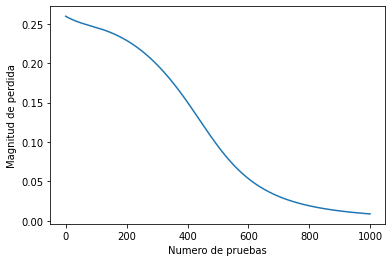

In [14]:
plt.xlabel("Numero de pruebas")
plt.ylabel("Magnitud de perdida")
plt.plot(XORTest.history["loss"])


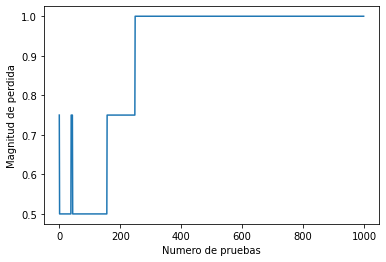

In [15]:
plt.xlabel("Numero de pruebas")
plt.ylabel("Magnitud de perdida")
plt.plot(XORTest.history["binary_accuracy"])

# Relu XOR



In [16]:
model = Sequential()
model.add(Dense(16,input_dim= 2,activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['binary_accuracy'])

XORTest = model.fit(entradas,
                    salidas,
                    epochs=1000
                    )

Epoch 1/1000
1/1 [==============================] - 0s 460ms/step - loss: 0.4748 - binary_accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.4666 - binary_accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.4587 - binary_accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.4510 - binary_accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.4435 - binary_accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.4363 - binary_accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.4293 - binary_accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.4225 - binary_accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.4160 - binary_accuracy: 0.5000
Epoch 10/1000
1/1 [==============================] 

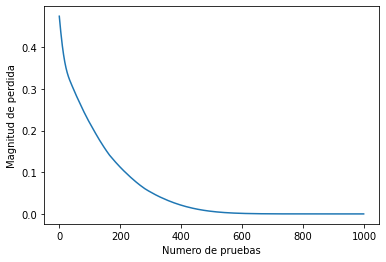

In [17]:
plt.xlabel("Numero de pruebas")
plt.ylabel("Magnitud de perdida")
plt.plot(XORTest.history["loss"])

# XOR de tres compuertas

In [18]:
entradas = np.array([
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1]
    ])
salidas =  np.array([[0],[1],[1],[0],[1],[0],[0],[1]])
#El Loss es el error cuardratico medio

In [23]:
model = Sequential()
model.add(Dense(3,input_dim= 3,activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['binary_accuracy'])

XOR3Test = model.fit(entradas,
                    salidas,
                    epochs=1000
                    )

Epoch 1/1000
1/1 [==============================] - 0s 411ms/step - loss: 0.8199 - binary_accuracy: 0.3125
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.8143 - binary_accuracy: 0.3125
Epoch 3/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.8088 - binary_accuracy: 0.3125
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.8033 - binary_accuracy: 0.3125
Epoch 5/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.7978 - binary_accuracy: 0.3125
Epoch 6/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.7924 - binary_accuracy: 0.3125
Epoch 7/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.7870 - binary_accuracy: 0.3125
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.7817 - binary_accuracy: 0.3125
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.7764 - binary_accuracy: 0.3125
Epoch 10/1000
1/1 [===========================

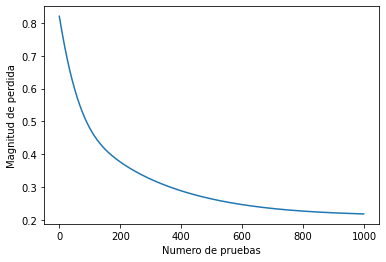

In [24]:
plt.xlabel("Numero de pruebas")
plt.ylabel("Magnitud de perdida")
plt.plot(XOR3Test.history["loss"])

# NAND 

In [20]:
entradas = np.array([
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1]
    ])
salidas =  np.array([[0,1],[1,1],[1,1],[0,1],[1,1],[0,1],[0,1],[1,0]])

In [21]:
model = Sequential()
model.add(Dense(15,input_dim= 3,activation='relu'))
model.add(Dense(2))

model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['binary_accuracy'])

NANDTest = model.fit(entradas,
                    salidas,
                    epochs=1000
                    )

Epoch 1/1000
1/1 [==============================] - 1s 719ms/step - loss: 0.8022 - binary_accuracy: 0.3125
Epoch 2/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.7946 - binary_accuracy: 0.3125
Epoch 3/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.7870 - binary_accuracy: 0.3125
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.7796 - binary_accuracy: 0.3125
Epoch 5/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.7721 - binary_accuracy: 0.3125
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.7648 - binary_accuracy: 0.3125
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.7575 - binary_accuracy: 0.3125
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.7504 - binary_accuracy: 0.3125
Epoch 9/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.7434 - binary_accuracy: 0.3125
Epoch 10/1000
1/1 [=============================

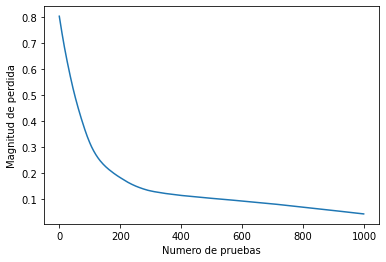

In [22]:
plt.xlabel("Numero de pruebas")
plt.ylabel("Magnitud de perdida")
plt.plot(NANDTest.history["loss"])